# Introduction
This script is to explore the correlation between sequence similarity and expression similarity
We are working with kinases, one2one orthologs in human and mouse

Input is a df with promoter pairs (human to mouse one2one orthologs) with different similarity values:
- Promoter similarity: sequence identity (global alignment)
- Domain identity: same but for kinase domain
- Expression similarity (cosine): calculated based on 5 tissues RNA-seq
- Expression similarity (pearson): calculated based on 5 tissues RNA-seq

In [2]:
# Load file
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import fisher_exact
import os



In [ ]:
# Define parameters
label_method = "cos_rank_5000"
family_id = "kinase"
transform_method = "clr_nofilter"
combined_df_file = f"../results/combined_similarity/{family_id}_{transform_method}_combined_similarity.tsv"
path = '/Users/crsitina/Documents/phd/promoter_expression/exploratory_analysis'
print(path)
os.chdir(path)



/Users/crsitina/Documents/phd/promoter_expression/exploratory_analysis


NameError: name 'os' is not defined

In [ ]:
import json

# Save the substitution matrix to a file
substitution_matrix_file = './results/substitution_matrix.json'
with open(substitution_matrix_file, 'w') as f:
    json.dump(substitution_matrix, f)

# To open the substitution matrix later
with open(substitution_matrix_file, 'r') as f:
    loaded_substitution_matrix = json.load(f)

# Verify the loaded matrix
print(loaded_substitution_matrix)

In [55]:
# Load file
combined_df = pd.read_csv(combined_df_file, sep = '\t')
print(combined_df.shape)

(75076, 9)


# Exploratory plots:
We will look at the relationship between promoter and expression similarity

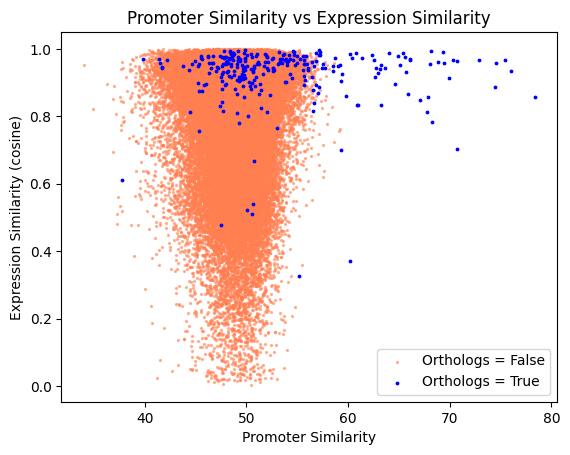

In [56]:
# Separte the df into orthologs = True and orthologs = False
orthologs_true = combined_df[combined_df['orthologs'] == True]
orthologs_false = combined_df[combined_df['orthologs'] == False]


# Plot promoter similarity against expression similarity (scatter plot)
plt.figure()
plt.scatter(orthologs_false['promoter_identity'], orthologs_false['exp_sim_cosine'], s=2, alpha=0.5, c = 'coral')
plt.scatter(orthologs_true['promoter_identity'], orthologs_true['exp_sim_cosine'], s=3, alpha=1, c='blue')
plt.legend(['Orthologs = False', 'Orthologs = True'])
plt.xlabel('Promoter Similarity')
plt.ylabel('Expression Similarity (cosine)')
plt.title('Promoter Similarity vs Expression Similarity')

plt.savefig(f'./plots/{family_id}_{transform_method}/promoter_vs_exp_sim_cosine.png', dpi=300, bbox_inches='tight')

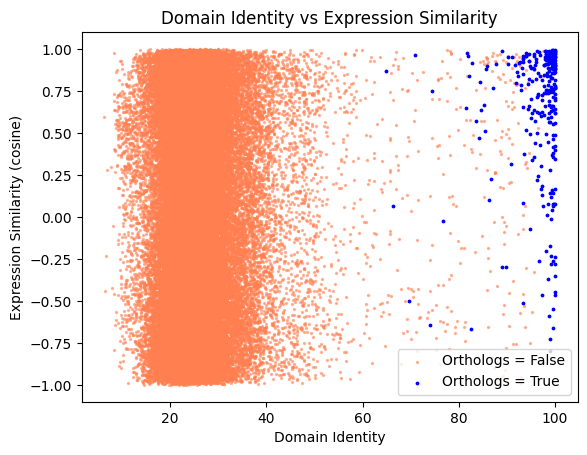

In [34]:
# Same for domain identity against expression similarity
plt.figure()
plt.scatter(orthologs_false['domain_identity'], orthologs_false['exp_sim_cosine'], s=2, alpha=0.5, c = 'coral')
plt.scatter(orthologs_true['domain_identity'], orthologs_true['exp_sim_cosine'], s=3, alpha=1, c='blue')
plt.legend(['Orthologs = False', 'Orthologs = True'])
plt.xlabel('Domain Identity')
plt.ylabel('Expression Similarity (cosine)')
plt.title('Domain Identity vs Expression Similarity')

plt.savefig(f'./plots/{family_id}_{transform_method}/domain_vs_exp_sim_cosine.png', dpi=300, bbox_inches='tight')


Text(0.5, 1.0, 'Promoter Similarity vs Expression Similarity')

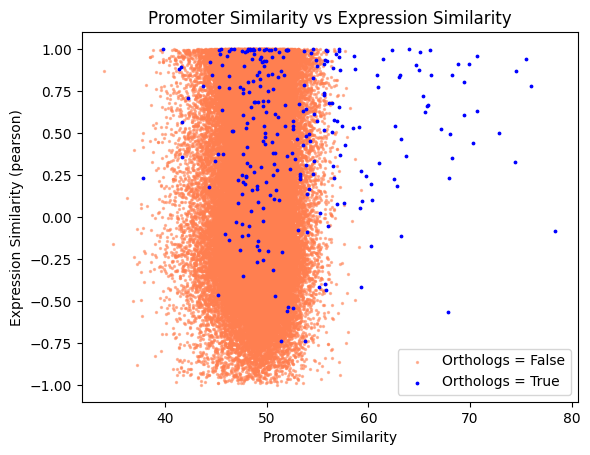

In [22]:
# Same plot but for x = promoter similarity y = expression similarity (pearson)
plt.figure()
plt.scatter(orthologs_false['promoter_identity'], orthologs_false['exp_sim_pearson'], s=2, alpha=0.5, c = "coral")
plt.scatter(orthologs_true['promoter_identity'], orthologs_true['exp_sim_pearson'], s=3, alpha=1, c='blue')
plt.legend(['Orthologs = False', 'Orthologs = True'])
plt.xlabel('Promoter Similarity')
plt.ylabel('Expression Similarity (pearson)')
plt.title('Promoter Similarity vs Expression Similarity')



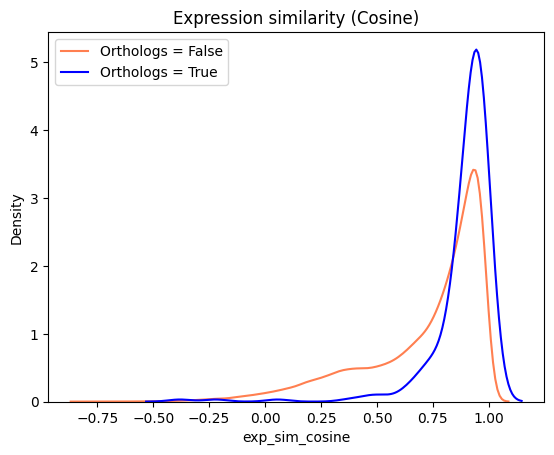

In [176]:
# Same but with density plot (one curve for orthologs = True and one for orthologs = False)
plt.figure()
sns.kdeplot(orthologs_false['exp_sim_cosine'], color = "coral", label = "non-orthologs")
sns.kdeplot(orthologs_true['exp_sim_cosine'], color = "blue", label = "orthologs")
plt.legend(['Orthologs = False', 'Orthologs = True'])
plt.title('Expression similarity (Cosine)')

plt.savefig(f'./plots/{family_id}_{transform_method}/exp_sim_cosine_density.png', dpi=300, bbox_inches='tight')


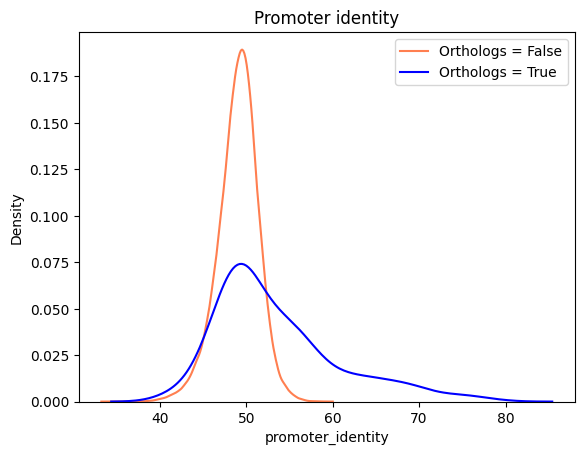

In [177]:
# Same for promoter identity
plt.figure()
sns.kdeplot(orthologs_false['promoter_identity'], color = "coral", label = "non-orthologs")
sns.kdeplot(orthologs_true['promoter_identity'], color = "blue", label = "orthologs")
plt.legend(['Orthologs = False', 'Orthologs = True'])
plt.title('Promoter identity')

plt.savefig(f'./plots/{family_id}_{transform_method}/promoter_identity_density.png', dpi=300, bbox_inches='tight')


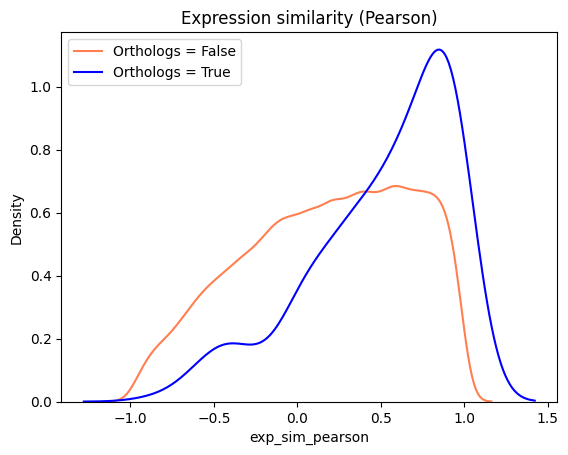

In [178]:
# Same for expression similarity (pearson)
plt.figure()
sns.kdeplot(orthologs_false['exp_sim_pearson'], color = "coral", label = "non-orthologs")
sns.kdeplot(orthologs_true['exp_sim_pearson'], color = "blue", label = "orthologs")
plt.legend(['Orthologs = False', 'Orthologs = True'])
plt.title('Expression similarity (Pearson)')

plt.savefig(f'./plots/{family_id}_{transform_method}/exp_sim_pearson_density.png', dpi=300, bbox_inches='tight')


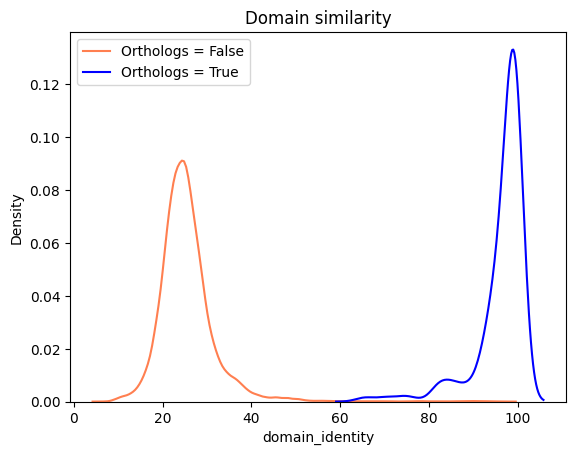

In [179]:
# Same ford domain similarity 
plt.figure()
sns.kdeplot(orthologs_false['domain_identity'], color = "coral", label = "non-orthologs")
sns.kdeplot(orthologs_true['domain_identity'], color = "blue", label = "orthologs")
plt.legend(['Orthologs = False', 'Orthologs = True'])
plt.title('Domain similarity')

plt.savefig(f'./plots/{family_id}_{transform_method}/domain_identity_density.png', dpi=300, bbox_inches='tight')


In [180]:
# Write some important statistics to a file
output_file = f'./results/{family_id}_{transform_method}_statistics.txt'

text = f"""
Statistics for {family_id} family and {transform_method} transformation
Number of orthologs = True: {orthologs_true.shape[0]}
Number of orthologs = False: {orthologs_false.shape[0]}
Max pearson similarity: {combined_df['exp_sim_pearson'].max()}
Max cosine similarity: {combined_df['exp_sim_cosine'].max()}
Max promoter identity: {combined_df['promoter_identity'].max()}

Mean pearson similarity (orthologs = True): {orthologs_true['exp_sim_pearson'].mean()}
Mean pearson similarity (orthologs = False): {orthologs_false['exp_sim_pearson'].mean()}

Mean cosine similarity (orthologs = True): {orthologs_true['exp_sim_cosine'].mean()}
Mean cosine similarity (orthologs = False): {orthologs_false['exp_sim_cosine'].mean()}

Mean promoter identity (orthologs = True): {orthologs_true['promoter_identity'].mean()}
Mean promoter identity (orthologs = False): {orthologs_false['promoter_identity'].mean()}

Correlation between promoter identity and expression similarity (pearson): {combined_df['promoter_identity'].corr(combined_df['exp_sim_pearson'])}
Correlation between promoter identity and expression similarity (cosine): {combined_df['promoter_identity'].corr(combined_df['exp_sim_cosine'])}

Correlation between domain identity and expression similarity (pearson): {combined_df['domain_identity'].corr(combined_df['exp_sim_pearson'])}
Correlation between domain identity and expression similarity (cosine): {combined_df['domain_identity'].corr(combined_df['exp_sim_cosine'])}
"""

with open(output_file, 'w') as f:
    f.write(text)


# What can we say about these plots?
In general, it alignes with the expected results: very high promoter similarity is informative of high expression similarity (as it is the case in some orthologs), but from 40-60% promoter similarity (where the big majority of the pairs are), sequence identity is not longer correlated with expression similarity. 

The idea is to obtain an alternative representation of the promoter sequence that is more informative (better correlated) with the expression similarity. 

Orthologs are a nice ground truth, but we need a bigger set of positives (and negatives) for training. 
There are multiple ways of defining them (top/bottom, threshold, etc.). See *pos_neg.ipynb* for further analysis

In [32]:
# Sort the dataframe by cosine similarity in decreasing order
merged_df = combined_df.copy()
merged_df = merged_df.sort_values(by="exp_sim_cosine", ascending=False)

# Initialize a list to store the results
results = []

# Iterate over the intervals
for i in np.arange(1, 0.5, -0.01):
    # Define the interval
    interval_df = merged_df[(merged_df["exp_sim_cosine"] <= i) & (merged_df["exp_sim_cosine"] > i - 0.01)]
    
    # Compute the number of orthologs in the interval
    number_orthologs = interval_df["orthologs"].sum()
    total_pairs = len(interval_df)
    
    # Compute the percentage of orthologs in the interval
    percentage_orthologs = number_orthologs / total_pairs if total_pairs > 0 else 0
    
    # Create a contingency table
    contingency_table = [[number_orthologs, total_pairs - number_orthologs], 
                         [merged_df["orthologs"].sum() - number_orthologs, len(merged_df) - total_pairs - (merged_df["orthologs"].sum() - number_orthologs)]]
    
    # Perform the Fisher's exact test
    odds_ratio, pvalue = fisher_exact(contingency_table)
    
    # Append the results to the list
    results.append({
        "Interval": f"{i:.2f}-{i-0.01:.2f}",
        "Number of orthologs": number_orthologs,
        "Total pairs": total_pairs,
        "Percentage of orthologs": percentage_orthologs,
        "Odds ratio": odds_ratio,
        "P-value": pvalue
    })

# Convert the results to a dataframe
results_df = pd.DataFrame(results)

In [36]:

# Save the results to a file
results_df.to_csv("../results/interval_orthologs_significance.tsv", sep="\t", index=False)
results_df.head(10)


,Interval,Number of orthologs,Total pairs,Percentage of orthologs,Odds ratio,P-value
0,1.00-0.99,10,650,0.015385,4.168750,0.000241
1,0.99-0.98,18,1561,0.011531,3.171738,0.000042
2,0.98-0.97,24,2190,0.010959,3.059956,0.000005
3,0.97-0.96,21,2565,0.008187,2.237961,0.001510
4,0.96-0.95,22,2740,0.008029,2.197742,0.001263
5,0.95-0.94,22,2574,0.008547,2.346711,0.000489
6,0.94-0.93,18,2637,0.006826,1.838090,0.022449
7,0.93-0.92,17,2516,0.006757,1.815207,0.030223
8,0.92-0.91,13,2231,0.005827,1.545299,0.118346
9,0.91-0.90,8,2097,0.003815,0.991604,1.000000


In [44]:
# How many pairs have cosine sim and pearson sim higher than threshold?
cos_sim_threshold = 0.94
pearson_cor_threshold = 0.5

cos_sim_pairs = combined_df[(combined_df['exp_sim_cosine'] > cos_sim_threshold) & (combined_df['exp_sim_pearson'] > pearson_cor_threshold)]
print('Number of pairs with cosine similarity > 0.94 and pearson similarity > 0.5: ', len(cos_sim_pairs))

# What should be the lower threshold for cosine similarity to have the same number of pairs as above?
cos_sim_lower = 0.5
pearson_lower = 0.25
cos_sim_pairs = combined_df[(combined_df['exp_sim_cosine'] < cos_sim_lower) & (combined_df['exp_sim_pearson'] < pearson_lower)]
print(f'Number of pairs with cosine similarity < {cos_sim_lower} and pearson similarity < {pearson_lower}: ', len(cos_sim_pairs))

Number of pairs with cosine similarity > 0.94 and pearson similarity > 0.5:  8149
Number of pairs with cosine similarity < 0.5 and pearson similarity < 0.25:  9570


In [46]:
# Add a column to the data frame named "label" that is P if the pair has cos_sim > 0.94 and pearson > 0.5; N if cos_sim < 0.5 and pearson < 0.25 and U otherwise
combined_df['label'] = 'U'
combined_df.loc[(combined_df['exp_sim_cosine'] > cos_sim_threshold) & (combined_df['exp_sim_pearson'] > pearson_cor_threshold), 'label'] = 'P'
combined_df.loc[(combined_df['exp_sim_cosine'] < cos_sim_lower) & (combined_df['exp_sim_pearson'] < pearson_lower), 'label'] = 'N'

# Save the data frame to a file
combined_df.to_csv('../results/kinase_combined_similarity_labelled.tsv', sep = '\t', index = False)

In [93]:
# Select the bottom 5000 pairs of combined_df
combined_df_bottom = combined_df.tail(5000)["label"]
combined_df_bottom

35896    U
25378    U
35263    U
46460    U
31736    U
        ..
17617    U
17605    U
17559    U
28147    U
17643    U
Name: label, Length: 5000, dtype: object

In [ ]:
# Another way of defining positive and negative
combined_df['label'] = 'U'
# Sort by exp_sim_cosine and label the top 5000 as positive
combined_df = combined_df.sort_values(by='exp_sim_cosine', ascending = False)

# top 5000 pairs
combined_df.loc[combined_df.index[:5000], 'label'] = 'P'

# bottom 5000 pairs
combined_df.loc[combined_df.index[-5000:], 'label'] = 'N'

# COunt the number of positive and negative pairs
print(combined_df['label'].value_counts())
# Save the data frame to a file
combined_df.to_csv('./results/kinase_combined_similarity_topbottom.tsv', sep = '\t', index = False)

label
N    35441
U    32159
Name: count, dtype: int64


In [ ]:
# One last approach, define positive and negative randomly 
combined_df['label'] = 'U'
# Filter the df to 10000 random pairs
random_df_labeled = combined_df.sample(10000)
random_df_unlabeled = combined_df.drop(random_df_labeled.index)

# Label the random pairs randomly as P or N
random_df_labeled.loc[np.random.choice(random_df_labeled.index, 5000, replace = False), 'label'] = 'P'
random_df_labeled.loc[np.random.choice(random_df_labeled.index, 5000, replace = False), 'label'] = 'N'

# Randomly select 5000 pairs
combined_df.loc[np.random.choice(combined_df.index, 5000, replace = False), 'label'] = 'P'
# Randomly select 5000 pairs
combined_df.loc[np.random.choice(combined_df.index, 5000, replace = False), 'label'] = 'N'

# Count the number of positive and negative pairs
print(combined_df['label'].value_counts())

# Save the data frame to a file
combined_df.to_csv('./results/kinase_combined_similarity_random.tsv', sep = '\t', index = False)

label
U    57979
N     5000
P     4621
Name: count, dtype: int64


In [ ]:
# One last approach, define positive and negative randomly 
combined_df['label'] = 'U'
# Filter the df to 10000 random pairs
random_df_labeled = combined_df.sample(10000)
random_df_unlabeled = combined_df.drop(random_df_labeled.index)

# Label the random pairs as P
random_df_labeled.loc[random_df_labeled.index, 'label'] = 'P'

# Label 5000 pairs randomly as N
random_df_labeled.loc[np.random.choice(random_df_labeled.index, 5000, replace = False), 'label'] = 'N'

# Count the number of positive and negative pairs
print(random_df_labeled['label'].value_counts())

# Combine with the unlabeled pairs
random_df = pd.concat([random_df_labeled, random_df_unlabeled])
print(random_df['label'].value_counts())

# Save the data frame to a file
random_df.to_csv('./results/kinase_combined_similarity_random.tsv', sep = '\t', index = False)

label
P    5000
N    5000
Name: count, dtype: int64
label
U    57600
P     5000
N     5000
Name: count, dtype: int64


In [124]:
random_df.to_csv('./results/kinase_combined_similarity_random.tsv', sep = '\t', index = False)

# Let's see if the model has learned something

In [ ]:
# Load the results of the model
all_results = pd.read_csv('../results/all_pairs_all_metrics_random.tsv', sep = '\t', index_col = 0)
all_results.shape

# Load the train pairs
train_pairs = pd.read_csv('../results/train_pairs_random.tsv', sep = '\t')
train_pairs.shape

# Extract a list of the pairs that are in the train set (gene_id_human, gene_id_mouse)
train_pairs_list = list(zip(train_pairs['gene_id_human'], train_pairs['gene_id_mouse']))

# Add a column to all_results that is True if the pair is in the train set and False otherwise
all_results['train'] = all_results.apply(lambda x: (x['gene_id_human'], x['gene_id_mouse']) in train_pairs_list, axis = 1)

In [130]:
# Divide the data frame into train and the rest
train_results = all_results[all_results['train']]
notrain_results = all_results[~all_results['train']]
print(train_results.shape, notrain_results.shape)

# The test results, divide them into positive/negative and unknown (label column)
pos_neg = notrain_results[notrain_results['label'] != 'U'] # validation and test set
unknown = notrain_results[notrain_results['label'] == 'U']
print(pos_neg.shape, unknown.shape)




(7000, 14) (60600, 14)
(3000, 14) (57600, 14)


Text(0.5, 1.0, 'Embedding similarity vs Expression similarity (cosine)')

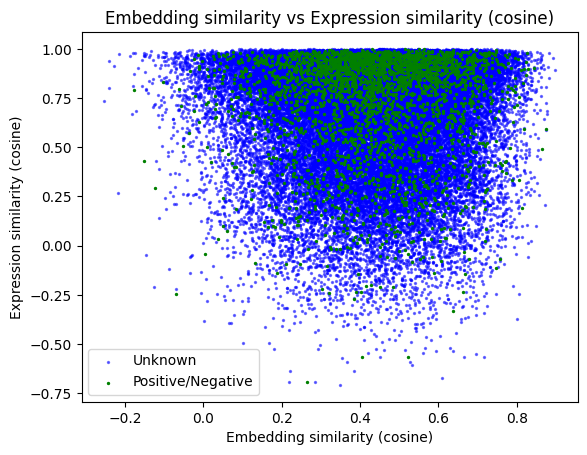

In [131]:
# Plot a scatter plot of emb_sim_cosine against exp_sim_cosing for the train and test sets
plt.figure()
plt.scatter(unknown['emb_sim_cos'], unknown['exp_sim_cosine'], s=2, alpha=0.5, c = 'blue')
plt.scatter(pos_neg['emb_sim_cos'], pos_neg['exp_sim_cosine'], s=2, alpha=1, c = 'green')
plt.legend(['Unknown', 'Positive/Negative'])
plt.xlabel('Embedding similarity (cosine)')
plt.ylabel('Expression similarity (cosine)')
plt.title('Embedding similarity vs Expression similarity (cosine)')

In [132]:
# compute pearsin correlation between emb_sim_cos and exp_sim_cos for the train and test sets
pearson_train = train_results['emb_sim_cos'].corr(train_results['exp_sim_cosine'])
pearson_test = notrain_results['emb_sim_cos'].corr(notrain_results['exp_sim_cosine'])
print('Pearson correlation between emb_sim_cos and exp_sim_cos for train set: ', pearson_train)
print('Pearson correlation between emb_sim_cos and exp_sim_cos for non training set: ', pearson_test)


Pearson correlation between emb_sim_cos and exp_sim_cos for train set:  0.011261210884578744
Pearson correlation between emb_sim_cos and exp_sim_cos for non training set:  0.013146319813166826


In [ ]:
all_results = all_results.sort_values(by = ["gene_id_human", "emb_sim_cos"], ascending = [True, False])

all_unique = all_results.drop_duplicates(subset = "gene_id_human", keep = "first")
all_unique = all_results.groupby('gene_id_human').head(2)
# Count the number of True in the orthologs column
all_unique["orthologs"].value_counts()

orthologs
False    255
True       5
Name: count, dtype: int64

In [83]:
# Same only with the pos/neg pairs
pos_neg_unique = pos_neg.sort_values(by = ["gene_id_human", "emb_sim_cos"], ascending = [True, False])
pos_neg_unique = pos_neg.drop_duplicates(subset = "gene_id_human", keep = "first")
print(pos_neg_unique["orthologs"].value_counts())
pos_neg_unique = pos_neg.groupby('gene_id_human').head(2)
# Count the number of True in the orthologs column
print(pos_neg_unique["orthologs"].value_counts())


orthologs
False    259
True       1
Name: count, dtype: int64
orthologs
False    516
True       3
Name: count, dtype: int64


In [82]:
all_unique = all_results.groupby('gene_id_human').head(100)
# Count the number of True in the orthologs column
all_unique["orthologs"].value_counts()

orthologs
False    25853
True       147
Name: count, dtype: int64

# Explore embedding similarity

Text(0.5, 1.0, 'Embedding similarity (cosine)')

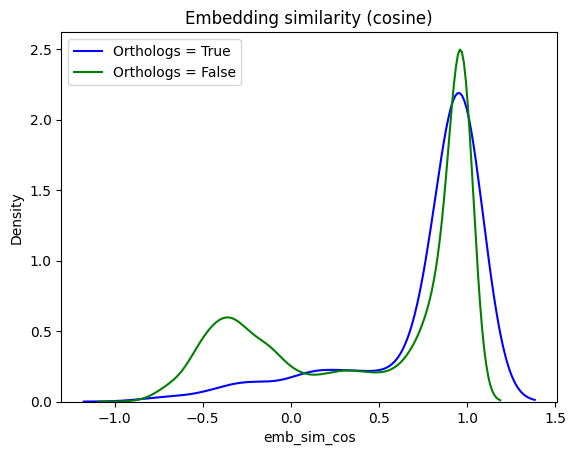

In [134]:
# Load results
all_results = pd.read_csv('../results/model_pairs/all_pairs_all_metrics_topbottom.tsv', sep = '\t', index_col = 0)
train_pairs = pd.read_csv('../results/model_pairs/train_pairs_topbottom.tsv', sep = '\t')


# Plot density of emb_sim_cos for orthologs and non-orthologs
plt.figure()
sns.kdeplot(all_results[all_results['orthologs'] == True]['emb_sim_cos'], color = "blue", label = "orthologs")
sns.kdeplot(all_results[all_results['orthologs'] == False]['emb_sim_cos'], color = "green", label = "non-orthologs")
plt.legend(['Orthologs = True', 'Orthologs = False'])
plt.title('Embedding similarity (cosine)')


In [ ]:
# Add a new column [model] to pairs_df and initialize it with 'None'
pairs_df['model'] = 'None'

# Create sets of pairs for training, validation, and test
training_pairs = set(zip(training_df['gene_id_human'], training_df['gene_id_mouse']))
validation_pairs = set(zip(validation_df['gene_id_human'], validation_df['gene_id_mouse']))
test_pairs = set(zip(test_df['gene_id_human'], test_df['gene_id_mouse']))

# Update the [model] column based on the membership in training, validation, or test sets
pairs_df['model'] = pairs_df.apply(
    lambda x: 'training' if (x['gene_id_human'], x['gene_id_mouse']) in training_pairs else
              'validation' if (x['gene_id_human'], x['gene_id_mouse']) in validation_pairs else
              'test' if (x['gene_id_human'], x['gene_id_mouse']) in test_pairs else 'None',
    axis=1
)